In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1 - Business Problem

___Consider only the below columns and prepare a prediction model for predicting Price___

___Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]___


# 2 - Data collection and Description

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\ToyotaCorolla.csv (1).crdownload",encoding='latin1')

In [3]:
df1 = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [4]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1265,8750,78,75226,110,1600,4,5,69,1035
1266,5950,71,75085,86,1300,5,5,69,1035
1267,8500,73,75000,110,1600,5,5,85,1075
1268,8950,69,75000,86,1300,4,5,69,1000


In [5]:
df1.describe

<bound method NDFrame.describe of       Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1265   8750         78  75226  110  1600      4      5             69    1035
1266   5950         71  75085   86  1300      5      5             69    1035
1267   8500         73  75000  110  1600      5      5             85    1075
1268   8950         69  75000   86  1300      4      5             69    1000
1269   8750         69  75000   86  1300      4      5             69    1000

[1270 rows x 9 columns]>

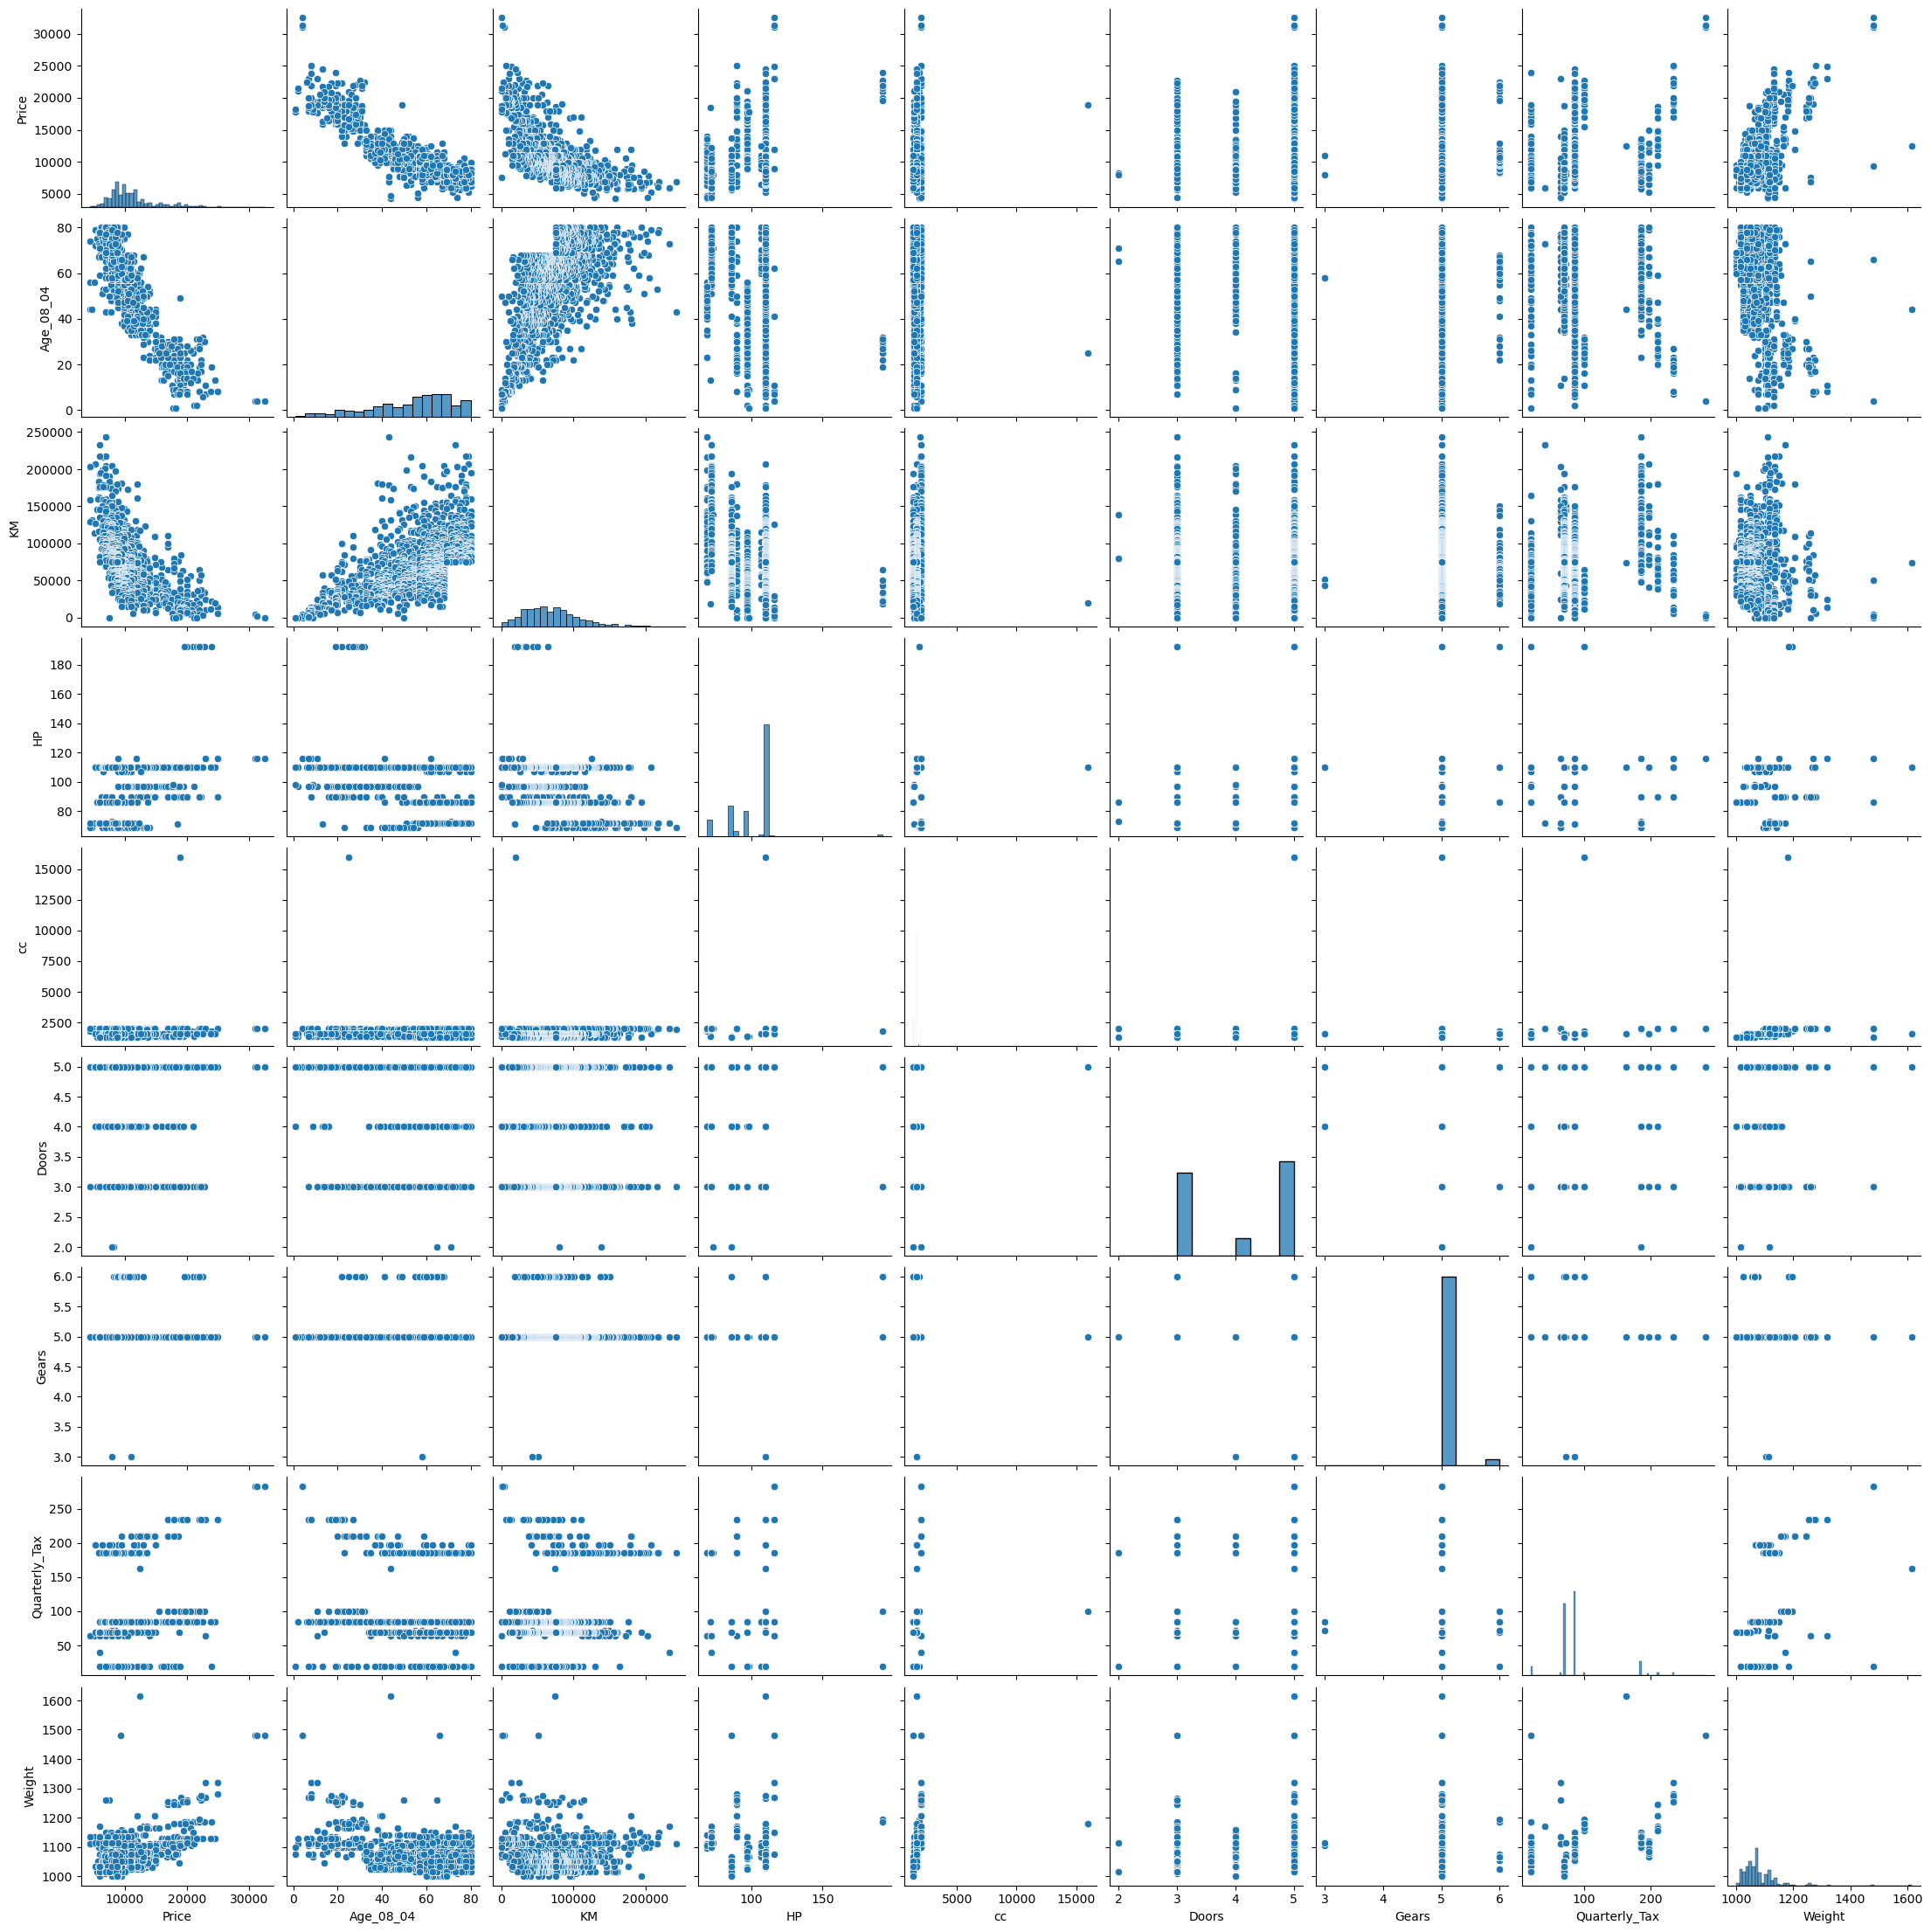

In [6]:
sns.pairplot(df1)

# 3 - Correlation Matrix

In [7]:
corrMatrix = df1.corr()

In [8]:
sns.heatmap(corrMatrix, annot=True)

<AxesSubplot:>

# 4 - Regression Model¶

In [9]:
X = df1[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Y = df1[['Price']]

In [10]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.131e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                        0.00
Time:                        23:47:52   Log-Likelihood:                         -10973.
No. Observations:                1270   AIC:                                  2.196e+04
Df Residuals:                    1262   BIC:                                  2.200e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -127.2566      2.965    -42.918      0.000    -133.074    -121.439
KM               -0.0197      0.001    -13.913      0.000      -0.022      -0.017
HP               36.4889      2.968     12.294      0.000      30.666      42.312
cc               -0.0782      0.092     -0.848      0.397      -0.259       0.103
Doors           -13.2758     43.265     -0.307      0.759     -98.156      71.604
Gears            23.3491    156.553      0.149      0.881    -283.784     330.482
Quarterly_Tax     5.8833      1.280      4.596      0.000       3.372       8.395
Weight           14.0153      0.806     17.383      0.000      12.434      15.597
==============================================================================
Omnibus:                       97.111   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.541
Skew:                           0.017   Prob(JB):                    7.49e-110
Kurtosis:                       6.082   Cond. No.                     3.27e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R sq and p Value of the Model is Good and the model can be accepted. However as you can see not all variables have acceptable p value. Thus we have Multicollinearity issue in our Data Frame

# 4.1 - Finding Cook's Distance

In [12]:
infl = model.get_influence()

In [13]:
summ_df = infl.summary_frame()

In [14]:
summ_df.sort_values('cooks_d', ascending=False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-1.005805e-01,-1.951931e+00,-2.111988,2.394237e+01,0.498843,0.562837,-3.792444e+00,-3.147643,6.942523e+01,6.796621,0.923214,23.566965,6.921790,24.000986
221,-3.320350e-01,5.475459e-02,0.154523,4.080071e-01,0.573138,1.592903,5.569437e-01,-1.714508,3.818566e-01,-6.082459,0.076274,-1.747814,-6.171177,-1.773307
960,-2.894697e-01,1.226610e-01,0.436568,1.911869e-01,0.557018,0.996661,7.733102e-01,-1.271307,2.115096e-01,-3.970631,0.096923,-1.300799,-3.994084,-1.308482
109,1.375440e-01,-2.956524e-01,0.124866,-1.808809e-01,-0.222112,-0.603687,3.330802e-01,0.552320,1.198445e-01,4.812829,0.039746,0.979161,4.855690,0.987881
601,-3.103801e-01,3.896242e-01,0.383961,-1.083671e-01,0.426678,0.572125,4.153797e-01,-0.771185,1.042527e-01,-5.448721,0.027325,-0.913248,-5.511780,-0.923817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,4.532434e-05,-3.039629e-05,0.000101,3.080232e-05,-0.000201,-0.000050,-3.243828e-05,0.000053,1.143002e-08,0.006464,0.002184,0.000302,0.006462,0.000302
708,1.397023e-05,-1.122960e-04,-0.000115,-1.292414e-05,0.000161,0.000059,6.327560e-05,-0.000049,9.256688e-09,-0.005093,0.002847,-0.000272,-0.005091,-0.000272
1107,2.537585e-05,3.800545e-05,0.000043,-3.720424e-06,0.000042,-0.000024,3.220581e-06,-0.000008,1.303883e-09,0.001552,0.004311,0.000102,0.001551,0.000102
495,-1.589511e-07,-2.203567e-07,0.000017,5.568627e-06,-0.000032,-0.000003,-5.575025e-06,0.000004,3.048473e-10,0.001076,0.002102,0.000049,0.001076,0.000049


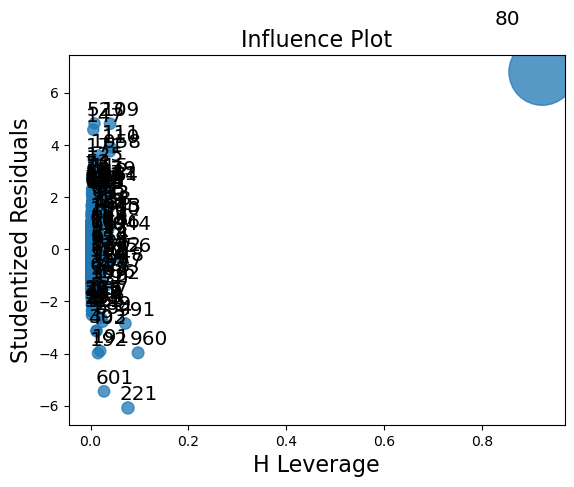

In [15]:
infl.plot_influence()

Index 80 has highest Cook's Distance.

Thus it will be wise to drop this row from the data set

# 4.2 - Finding Variance Inflation Factor (VIF)¶

In [16]:
vif = pd.DataFrame()

In [17]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [18]:
vif["features"] = X.columns

In [19]:
vif.round(1)

,VIF Factor,features
0,18.8,Age_08_04
1,8.7,KM
2,62.4,HP
3,15.5,cc
4,21.9,Doors
5,418.6,Gears
6,10.8,Quarterly_Tax
7,507.6,Weight


As expected, Geras and Weight have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables to improve model and try to solve multicolinearity.

In [20]:
# Removed Weight fron the dataframe and Tested the model
new_X = df1[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]

In [21]:
new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)

In [22]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.040e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                        0.00
Time:                        23:54:50   Log-Likelihood:                         -11110.
No. Observations:                1270   AIC:                                  2.223e+04
Df Residuals:                    1263   BIC:                                  2.227e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -136.5468      3.246    -42.070      0.000    -142.914    -130.179
KM               -0.0190      0.002    -12.089      0.000      -0.022      -0.016
HP               47.1624      3.231     14.595      0.000      40.823      53.502
cc                0.1883      0.101      1.860      0.063      -0.010       0.387
Doors           281.9786     44.283      6.368      0.000     195.103     368.854
Gears          2372.0986     87.991     26.958      0.000    2199.473    2544.724
Quarterly_Tax    16.9383      1.236     13.701      0.000      14.513      19.364
==============================================================================
Omnibus:                      160.842   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.819
Skew:                           0.636   Prob(JB):                    2.63e-107
Kurtosis:                       5.767   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you can see, once we remove "Weight" from input variables and run the model again, all the variables are significant.

# 5 - Final Model

In [23]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_df = df1.drop(df1.index[80])

In [24]:
new_X = new_df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]
new_Y = new_df[['Price']]

In [25]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [26]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.037e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                        0.00
Time:                        23:56:54   Log-Likelihood:                         -11101.
No. Observations:                1269   AIC:                                  2.222e+04
Df Residuals:                    1262   BIC:                                  2.225e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -136.3632      3.252    -41.929      0.000    -142.744    -129.983
KM               -0.0194      0.002    -11.911      0.000      -0.023      -0.016
HP               46.0744      3.447     13.365      0.000      39.311      52.838
cc                0.4750      0.332      1.430      0.153      -0.176       1.126
Doors           277.7493     44.531      6.237      0.000     190.387     365.112
Gears          2327.3674    100.892     23.068      0.000    2129.432    2525.303
Quarterly_Tax    16.0288      1.592     10.066      0.000      12.905      19.153
==============================================================================
Omnibus:                      159.866   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.750
Skew:                           0.631   Prob(JB):                    4.49e-107
Kurtosis:                       5.769   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5 - Output Interpretation

1 - p-value < 0.01

Thus the model is accepted

2 - coefficient == -132.01

Thus if the value of x increased by 1, the predicted value of Price will decrease by 132.01

3 - Adj. R-sqared == 0.983

Thus the model explains 98.3% of the variance in dependent variable